In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from scipy import stats

import ipywidgets

from src.vizualization import VibrationPlots

In [2]:
df_raw: pd.DataFrame = pd.read_csv(
    'data/processed_data.csv',
    parse_dates=["Time"],
    index_col=[0],
    sep=';'
)

# Drop rows where 'Vibration' column has NaN values
df = df_raw.dropna(subset=['feature']).copy()

In [3]:
# Z-score
df['z_score'] = stats.zscore(df['feature'])
df_outliers = df[df['z_score'].abs() > 3]

In [4]:
df_outliers.head()

,feature,Alimentação BU,Alimentação BS,CEEE,% Clínquer,% Gesso mineral,% Gesso sintético,% calcário,% pó filler,% escória,...,Camada - R4,Camada - R5,Camada - R6,Pressão - R1,Pressão - R2,Pressão - R3,Pressão - R4,Pressão - R5,Pressão - R6,z_score
Time,,,,,,,,,,,,,,,,,,,,,
2023-08-01 04:58:00,0.043100,41.014873,40.956271,23.732629,84.837698,4.513178,0.0,5.641644,4.99,0.016063,...,80.307860,88.392360,79.52200,154.8611,154.5139,152.777800,153.819400,153.472200,155.5556,-4.276507
2023-08-01 04:59:00,0.338521,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.733800,67.776060,66.50116,147.5694,142.3611,138.194400,143.576400,135.763900,146.0069,-3.159160
2023-08-01 05:00:00,0.338521,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.733795,67.776062,66.50116,147.5694,142.3611,138.194443,143.576385,135.763885,146.0069,-3.159160
2023-08-01 05:01:00,0.338521,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.733800,67.776060,66.50116,147.5694,142.3611,138.194400,143.576385,135.763900,146.0069,-3.159160
2023-08-01 05:59:00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83.201390,73.201390,80.60706,146.0069,142.3611,148.437500,146.006900,140.451400,153.1250,-4.439520


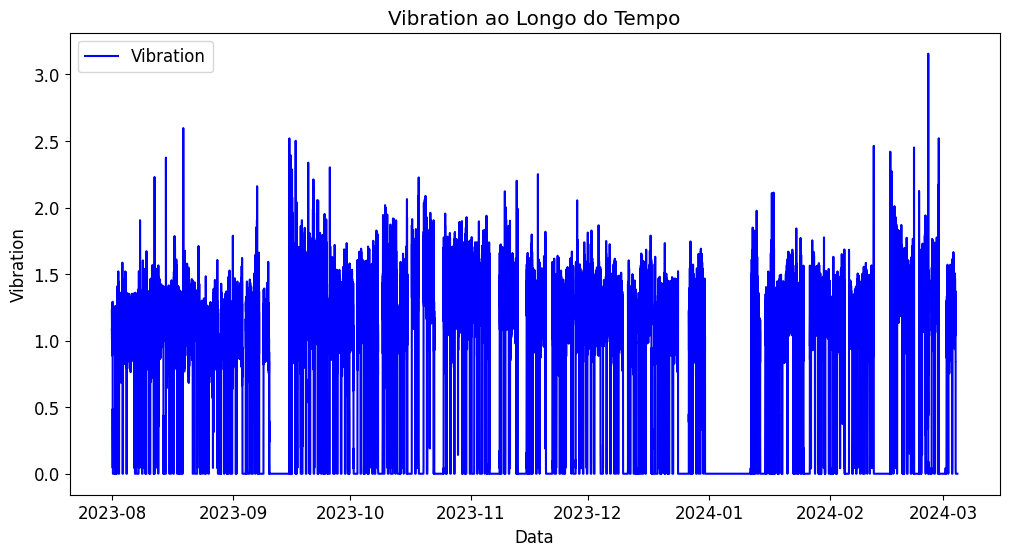

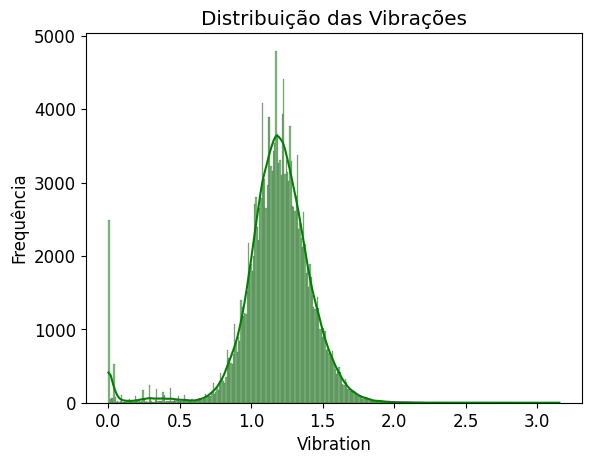

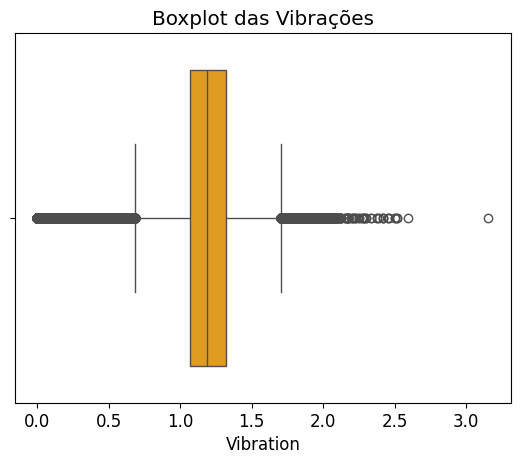

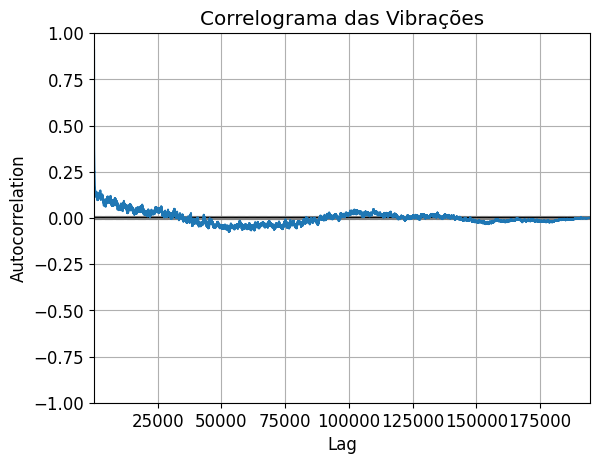

In [6]:
plot = VibrationPlots(df)
plot.general()
plot.hist()
plot.box()
plot.corr()

In [8]:
# Count the number of outliers
def count_outliers(df: pd.DataFrame):
    return df[df['z_score'] > 3].shape[0]

In [ ]:
plot_z_score(df_outliers, 'feature')
plot_detail_z_score(df_outliers, 'feature')
print(f'Número de outliers: {count_outliers(df_outliers)}')
print(f'Número de amostras: {df_outliers.shape[0]}')
print(f'Porcentagem de outliers: {count_outliers(df_outliers) / df_outliers.shape[0] * 100:.2f}%')

### **Análise Outliers**

---

#### **1. Z-Score**
- A linha vermelha, que mostra o Z-score, apresenta vários picos acima e abaixo de **±3**, o que indica outliers significativos, porém alguns influenciados por momentos normais de processo, como paradas planejadas.
- A porcentagem de outliers é de 3% do total de amostras presentes.

In [10]:
# Teste Anderson-Darling
def anderson_darling_test(df: pd.DataFrame, feature: str):
    result = stats.anderson(df.loc[:, feature], dist='norm')

    # Exibir os resultados
    print(f'Estatística do teste: {result.statistic:.3f}')
    for i, (sl, cv) in enumerate(zip(result.significance_level, result.critical_values)):
        print(f'Nível de significância {sl}%: Valor crítico {cv:.3f}')

    # Interpretação
    if result.statistic < result.critical_values[2]:  # Usando 5% de significância
        print("Os dados seguem uma distribuição normal (não rejeitamos H0)")
    else:
        print("Os dados NÃO seguem uma distribuição normal (rejeitamos H0)")

In [ ]:
# Estatísticas descritivas
desc_stats = df_abs['feature'].describe()
print("Estatísticas Descritivas:\n", desc_stats)

# Coeficiente de Variação (CV)
cv = np.std(df_abs['feature']) / np.mean(df['feature'])
print("Coeficiente de Variação:", cv)

# Skewness e Kurtosis
skewness = df_abs['feature'].skew()
kurtosis = df_abs['feature'].kurt()
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

anderson_darling_test(df_abs, 'feature')

print("___________________________\n")

# Estatísticas descritivas
desc_stats = df['feature'].describe()
print("Estatísticas Descritivas:\n", desc_stats)

# Coeficiente de Variação (CV)
cv = np.std(df['feature']) / np.mean(df['feature'])
print("Coeficiente de Variação:", cv)

# Skewness e Kurtosis
skewness = df['feature'].skew()
kurtosis = df['feature'].kurt()
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

anderson_darling_test(df, 'feature')

### **Análise Estatística dos Dados de Vibração**

---

#### **1. Estatísticas Descritivas**
- **Contagem (count):** 194.557 observações, um número significativo de dados coletados minuto a minuto ao longo de 6 meses.
- **Média (mean):** **1.1738**. A vibração média gira em torno desse valor.
- **Desvio Padrão (std):** **0.2644**. A dispersão dos dados em torno da média é moderada.
- **Mínimo (min):** **0.0**. Valores zerados podem indicar paradas ou falhas na medição.
- **Percentis (25%, 50%, 75%):**
   - **25%:** 1.0655  
   - **Mediana (50%):** 1.1897  
   - **75%:** 1.3207  
   - A distribuição dos dados está **levemente concentrada acima de 1.0**, o que significa que a maior parte dos valores é relativamente próxima da média.
- **Máximo (max):** **3.1553**. Existem valores extremos que representam picos de vibração.

---

#### **2. Coeficiente de Variação (CV):**
- O CV é calculado como a razão entre o desvio padrão e a média:
  \[
  CV = \frac{\text{Desvio Padrão}}{\text{Média}} = 0.225
  \]
- **Interpretação:**
   - Um coeficiente de variação de **0.225 (22,5%)** indica uma **variabilidade moderada** nos dados em relação à média.
   - Isso sugere que, apesar da presença de outliers e variações, os valores de vibração não têm dispersão extrema.

---

#### **3. Assimetria (Skewness):**
- **Skewness = -1.60** (valor negativo):
   - A distribuição é **negativamente assimétrica**, ou seja, a cauda esquerda da distribuição é mais longa.
   - Isso indica que existem **valores mais baixos** de vibração (próximos a zero), possivelmente associados a:
     - **Paradas do equipamento**.
     - **Reduções temporárias** na operação.
   - A concentração maior de valores está acima de **1.0**, com raros valores baixos (outliers para a esquerda).

---

#### **4. Curtose:**
- **Curtose = 6.04**:
   - A curtose indica que a distribuição é **leptocúrtica**, ou seja, possui **caudas longas e picos mais elevados** do que uma distribuição normal.
   - Isso sugere a presença de **outliers**, tanto na parte inferior (valores próximos de 0) quanto superior (picos de vibração).

---

#### **5. Análise Geral**
- A distribuição dos dados de vibração é **moderadamente concentrada**, com uma **média de 1.17** e **baixa dispersão** (CV de 22,5%).
- **Assimetria negativa** e **alta curtose** sugerem:
   - **Presença de valores zerados**, possivelmente indicando **falhas** ou **paradas** no sistema.
   - Picos de vibração fora do padrão.
- O comportamento geral sugere que, na maior parte do tempo, os valores de vibração oscilam próximos à média, mas há momentos específicos em que ocorrem **quedas abruptas ou aumentos extremos**.

---

#### **Conclusões**
1. **Análise de Outliers:**
   - Identificar os períodos onde os valores se aproximam de zero e correlacioná-los com registros operacionais.
   - Analisar os valores máximos para entender possíveis **sobrecargas** ou condições críticas do equipamento.

2. **Segmentação Temporal:**
   - Dividir os dados por períodos (ex.: diários ou semanais) para entender o comportamento da sazonalidade mais claramente.
   - Comparar horários e dias específicos para correlacionar com picos e quedas.

3. **Modelagem Preditiva:**
   - A alta curtose e a assimetria sugerem que modelos tradicionais (como regressão linear) podem não capturar bem esses padrões.
   - Modelos como **LSTM**, SARIMA ou técnicas baseadas em **detectores de anomalia** (ex.: Isolation Forest) podem ser usados para prever vibrações e detectar comportamentos anormais.

---


In [ ]:
decomposition = sm.tsa.seasonal_decompose(df['feature'], model='additive', period=1440)  # period = 1440 para dados diários de 1min
fig = decomposition.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

### **Análise da Decomposição Sazonal (Seasonal Decompose)**

---

#### **1. Gráfico Geral**
O gráfico gerado pelo `seasonal_decompose` foi dividido em quatro componentes principais:

1. **Série Original (feature):**
   - Representa os valores brutos da série temporal de vibração, registrados **minuto a minuto** durante **8 meses**.
   - A série apresenta uma grande quantidade de oscilações e ruído, mas com padrões visíveis de períodos de estabilidade e instabilidade.

2. **Tendência (Trend):**
   - A **tendência** captura o comportamento de longo prazo dos dados.
   - Observações:
     - Há um crescimento gradual na tendência até meados de 2023-11, seguido de períodos de estabilização.
     - Pequenas quedas bruscas indicam **anomalias** ou **falhas temporárias**, possivelmente associadas a paradas ou intervenções no processo.
     - O aumento recente sugere **picos de vibração recorrentes** no final da série, indicando uma possível mudança nas operações do equipamento.

3. **Sazonalidade (Seasonal):**
   - A **componente sazonal** evidencia **oscilações periódicas** nos dados, capturando padrões de curto prazo.
   - Com um **período de 1440 minutos** (equivalente a 1 dia), observa-se:
     - Um **padrão diário consistente**, onde os valores de vibração oscilam de forma **regular**.
     - Algumas alterações no padrão sazonal ao longo do tempo podem indicar variações no comportamento diário do processo.

4. **Resíduos (Residual):**
   - Os **resíduos** representam os valores que **não foram explicados** pela tendência ou sazonalidade.
   - Observações:
     - A presença de **picos positivos e negativos** sugere **anomalias** ou ruídos nos dados.
     - Resíduos mais acentuados podem estar associados a eventos **incomuns**, como falhas de equipamento, paradas inesperadas ou mudanças bruscas no processo.
     - Em vários momentos, os resíduos mostram **clusters de pontos fora do padrão**, indicando que há variações não capturadas pelos componentes anteriores.

---

#### **2. Interpretação**
A decomposição sazonal revelou os seguintes pontos-chave:
1. **Tendência Ascendente com Oscilações:**
   - A tendência geral dos dados sugere um **aumento gradativo** nos valores de vibração ao longo do tempo.
   - Isso pode estar relacionado a mudanças no funcionamento do equipamento, desgaste ou alterações no processo operacional.

2. **Sazonalidade Diária:**
   - Os dados possuem um **comportamento cíclico diário** (período = 1440 minutos), o que indica padrões regulares de vibração ao longo do dia.
   - Qualquer desvio significativo desse padrão sazonal pode ser **sinal de anomalias** ou **mudanças no processo**.

3. **Resíduos e Anomalias:**
   - Os resíduos exibem **variações significativas**, sugerindo que nem toda a variabilidade dos dados foi explicada pela decomposição.
   - Eventos pontuais, como **picos de vibração ou quedas abruptas**, devem ser analisados com cuidado para entender suas causas.

---


In [ ]:
widow_size = 10080  # 1 semana de dados (7 dias * 24 horas * 60 minutos)
df['SMA_7'] = df['feature'].rolling(window=widow_size).mean()
df['EMA_7'] = df['feature'].ewm(span=widow_size, adjust=False).mean()

NUM_SAMPLES = 43200 # 1 mes de dados (30 dias * 24 horas * 60 minutos)

plt.figure(figsize=(12, 6))
plt.plot(df['feature'], label="Original")
plt.plot(df['SMA_7'], label="SMA (7 dias)", linestyle="--")
plt.plot(df['EMA_7'], label="EMA (7 dias)", linestyle=":")
#plt.plot(df['feature'].head(NUM_SAMPLES), label="Original")
#plt.plot(df['SMA_7'].head(NUM_SAMPLES), label="SMA (7 dias)", linestyle="--")
#plt.plot(df['EMA_7'].head(NUM_SAMPLES), label="EMA (7 dias)", linestyle=":")
plt.legend()
plt.show()

#### **Principais Observações:**

1. **Tendência Geral:**
    A série original oscila em torno de uma média central próxima a 1.0.
    Tanto a SMA quanto a EMA indicam uma tendência estável no longo prazo, com variações sutis.

2. **Picos e Ruído:**
    Existem picos bem altos (valores > 2.5) em momentos específicos, que podem ser considerados anomalias ou flutuações extremas.
    Há também períodos com muitos valores baixos, sugerindo possíveis interrupções ou falhas no processo.

3. **Diferença entre SMA e EMA:**
    A EMA acompanha as oscilações da série original de forma mais próxima do que a SMA devido ao maior peso nos dados recentes.
    A SMA apresenta uma suavização mais "atrasada" e estável, o que é esperado.